In [1]:
from symbulate import *
%matplotlib inline

In [2]:
states = [1,2]

transition_matrix = [[0.1, 0.9],
                     [0.7, 0.3]]

initial_dist = [0.5, 0.5]

P = MarkovChainProbabilitySpace(transition_matrix,
                               initial_dist,
                               state_labels=states)

X = RV(P)

In [3]:
X.sim(10)

0,"(2, 1, 1, 2, 2, 2, ...)"
1,"(1, 2, 1, 2, 1, 2, ...)"
2,"(2, 1, 2, 2, 1, 2, ...)"
3,"(2, 1, 1, 2, 1, 2, ...)"
4,"(1, 2, 2, 2, 1, 2, ...)"
5,"(2, 1, 2, 2, 2, 2, ...)"
6,"(1, 2, 1, 2, 1, 2, ...)"
7,"(1, 2, 1, 2, 1, 1, ...)"
8,"(1, 2, 2, 1, 2, 1, ...)"
...,...
9,"(1, 2, 1, 2, 2, 1, ...)"


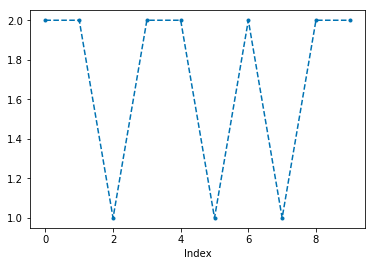

In [4]:
X.sim(1).plot()

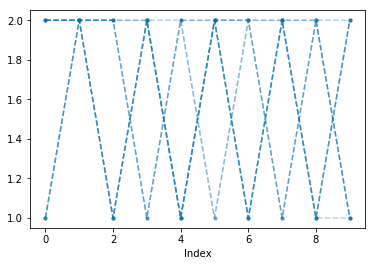

In [5]:
X.sim(10).plot()

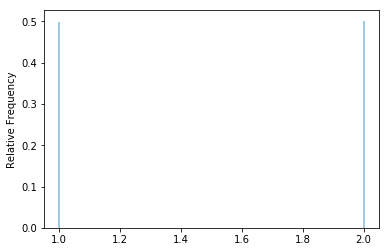

In [6]:
X[0].sim(10000).plot()

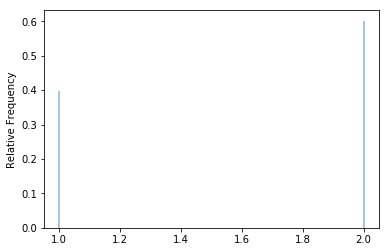

In [7]:
X[1].sim(10000).plot()

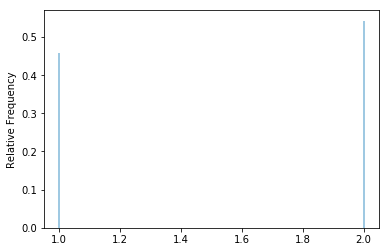

In [8]:
X[2].sim(10000).plot()

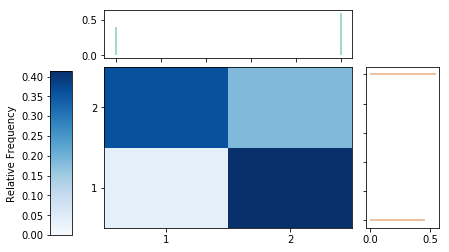

In [9]:
(X[1] & X[2]).sim(10000).plot(['tile', 'marginal'])

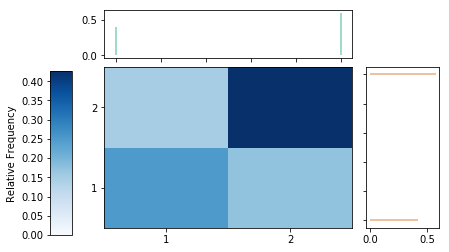

In [10]:
(X[1] & X[3]).sim(10000).plot(['tile', 'marginal'])

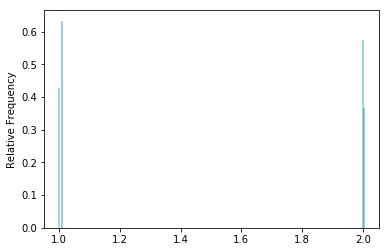

In [11]:
(X[3] | (X[1] == 1) ).sim(10000).plot(jitter=True)
X[3].sim(10000).plot()

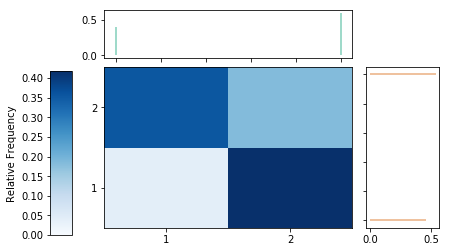

In [12]:
(X[1] & X[2]).sim(10000).plot(['tile', 'marginal'])

0.4452

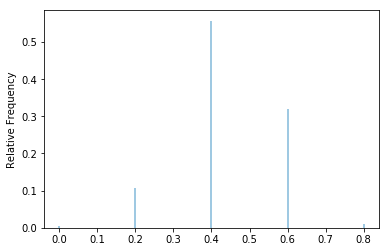

In [13]:
nmax = 4
V = X[range(nmax+1)].apply(count_eq(1)) / (nmax+1)
v = V.sim(10000)
v.plot()
v.mean()

In [14]:
def hitting_time_in_state(sequence, state):
    return next( (i for i, x in enumerate(sequence) if x == state), 999999999)

hitting_time_in_state((10,4,5,2,4,5,), 7)

999999999

In [15]:
def hitting_time_in_set(sequence, states):
    return next( (i for i, x in enumerate(sequence) if x in states), 999999999)

hitting_time_in_set((10,4,5,2,4,5,), [2,5])

2

In [16]:
T = RV(P, lambda x: hitting_time_in_state(x, 1))
T.sim(10000).tabulate()

0,5028
1,3501
2,1031
3,307
4,94
5,25
6,9
7,3
8,2
Total,10000
